In [ ]:
pip install selenium


In [30]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import pandas as pd

# Path to your chromedriver
CHROMEDRIVER_PATH = "C://Users//Aryan//Downloads//chromedriver-win64//chromedriver-win64//chromedriver.exe"

options = Options()
options.add_argument("--headless")  # optional: show browser if needed
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36"
)

service = Service(CHROMEDRIVER_PATH)
driver = webdriver.Chrome(service=service, options=options)


In [31]:
def scrape_remoteok(query="data analyst"):
    base_url = f"https://remoteok.com/remote-{query.replace(' ', '-')}-jobs"
    driver.get(base_url)
    time.sleep(5)  # wait for page to load

    jobs = []

    job_cards = driver.find_elements(By.CSS_SELECTOR, "tr.job")

    for card in job_cards:
        try:
            title = card.find_element(By.CSS_SELECTOR, "td.position h2").text.strip()
            company = card.find_element(By.CSS_SELECTOR, "td.company h3").text.strip()
            location = card.find_element(By.CSS_SELECTOR, "div.location").text.strip()
            tags = [tag.text for tag in card.find_elements(By.CSS_SELECTOR, "td.tags span")]
            date = card.find_element(By.CSS_SELECTOR, "time").get_attribute("datetime")
            url = card.get_attribute("data-url")
            
            jobs.append({
                "title": title,
                "company": company,
                "location": location,
                "tags": ", ".join(tags),
                "date_posted": date,
                "job_url": f"https://remoteok.com{url}"
            })
        except Exception as e:
            continue

    return pd.DataFrame(jobs)


In [32]:
df_remoteok = scrape_remoteok("data analyst")
df_remoteok.head()


,title,company,location,tags,date_posted,job_url
0,Senior Data Engineer,Alqen,🌏 Worldwide,,2024-04-12T00:00:04+00:00,https://remoteok.com/remote-jobs/remote-senior...
1,Principal Software Engineer Data Scientist,Cardlytics,🌏 Probably worldwide,,2022-03-09T01:15:04+00:00,https://remoteok.com/remote-jobs/109456-remote...
2,Principal Software Engineer Applied Science Da...,Cardlytics,🌏 Probably worldwide,,2022-02-25T19:15:04+00:00,https://remoteok.com/remote-jobs/109197-remote...
3,Marketing Data Scientist,Recast,🇺🇸 United States,,2021-12-28T19:06:36+00:00,https://remoteok.com/remote-jobs/107901-remote...
4,Machine learning engineer for large scale ML p...,OneSecondDelivery,💃 Latin America,,2021-10-31T18:31:56+00:00,https://remoteok.com/remote-jobs/106921-remote...


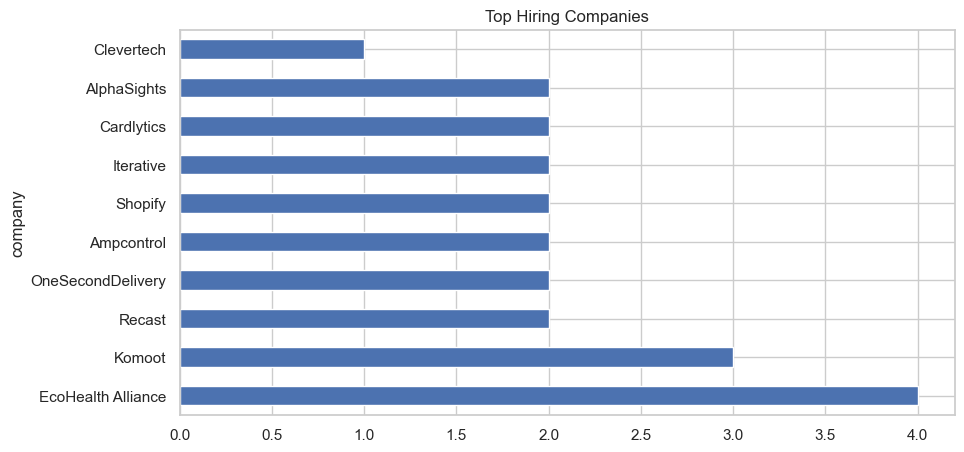

In [33]:
df_remoteok['company'].value_counts().head(10).plot(kind='barh', title='Top Hiring Companies', figsize=(10,5));
